In [33]:
import sklearn
from sklearn import linear_model
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from fbprophet import Prophet
from pandas.plotting import autocorrelation_plot
import statsmodels
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
import seaborn as sns

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv('Time_Series_Predict_Web_Traffic.txt', header = None)
df.head()

,0
0,1339
1,1462
2,1702
3,1656
4,1439


In [13]:
df['ds'] = (pd.date_range(start = "2012-10-01", periods = len(df)))
df = df.rename(columns={0: "y"})
print(df)

       y         ds
0   1339 2012-10-01
1   1462 2012-10-02
2   1702 2012-10-03
3   1656 2012-10-04
4   1439 2012-10-05
5   1208 2012-10-06
6   1613 2012-10-07
7   1935 2012-10-08
8   1964 2012-10-09
9   2003 2012-10-10
10  2023 2012-10-11
11  1559 2012-10-12
12  1274 2012-10-13
13  1805 2012-10-14
14  2051 2012-10-15
15  2024 2012-10-16
16  2049 2012-10-17


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.


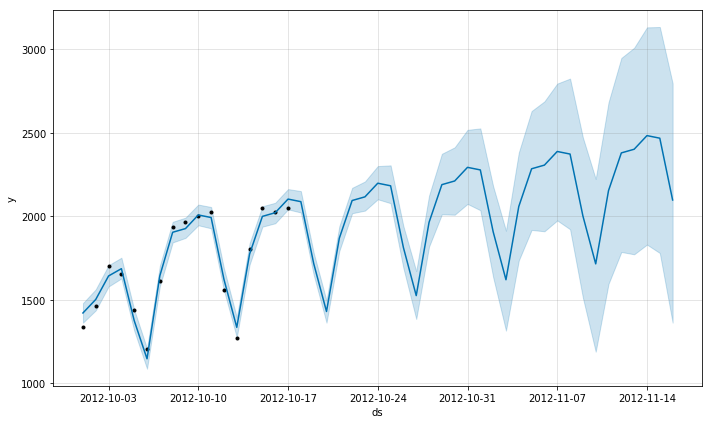

In [24]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = 30)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

In [32]:
for yhat in forecast['yhat'][len(df):]:
    print(round(yhat,2))

2087.62
1717.63
1430.15
1868.73
2094.49
2116.45
2198.1
2182.62
1812.64
1525.16
1963.73
2189.49
2211.46
2293.11
2277.63
1907.64
1620.17
2058.74
2284.5
2306.47
2388.11
2372.63
2002.65
1715.17
2153.75
2379.5
2401.47
2483.12
2467.64
2097.65


ARIMA MODEL

ValueError: operands could not be broadcast together with shapes (29,) (15,) (29,) 

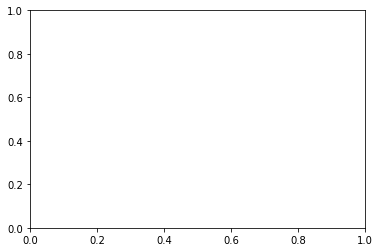

In [35]:
plot_acf(df['y'], lags = 30)
plt.show()